# Amazon Product Recommedation project

## 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,find data characteristics)

In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [2]:
#Read input file
amz_df = pd.read_csv("ratings_Electronics.csv",header=None,names=['userId', 'productId', 'ratings','timestamp'])

In [3]:
amz_df.head(10)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [4]:
#Drop timestamp column as its not a required feature for this project
amz_df.drop('timestamp',axis=1,inplace=True)

### EDA

In [5]:
amz_df.shape

(7824482, 3)

In [6]:
amz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


###### This dataset is huge with more than 78 lakhs of records. The only numeric type column is the ratings column.

In [7]:
amz_df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

In [8]:
amz_df.count()

userId       7824482
productId    7824482
ratings      7824482
dtype: int64

###### There seems to be no null or missing values here.

In [9]:
ratings_range=amz_df['ratings'].unique()

In [10]:
sorted(ratings_range)

[1.0, 2.0, 3.0, 4.0, 5.0]

###### The ratings range from 1 to 5

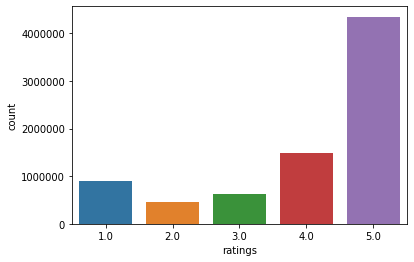

In [11]:
sns.countplot(amz_df['ratings'])

###### The bulk of users in this dataset have rated most of the products as 5. The seems to be very few ratings of the others.

In [12]:
amz_df['userId'].describe()

count           7824482
unique          4201696
top       A5JLAU2ARJ0BO
freq                520
Name: userId, dtype: object

###### It can be seen that maximum # of ratings by a user is 520

In [13]:
amz_df['productId'].describe()

count        7824482
unique        476002
top       B0074BW614
freq           18244
Name: productId, dtype: object

###### The maximum # of ratings received by a product is 18244

### Grouping users by the total number of ratings given by each user

In [14]:
amz_df1=amz_df.groupby(['userId']).count()[['ratings']]
pd.DataFrame(amz_df1)

,ratings
userId,
A00000262KYZUE4J55XGL,1
A000063614T1OE0BUSKUT,2
A00009182QVLSWIGHLS1B,1
A00009661LC9LQPGKJ24G,1
A00010809P09NUU6ZP6H,1
...,...
AZZZOVIBXHGDR,3
AZZZRS1YZ8HVP,2
AZZZSIK7NFFVP,1


In [15]:
amz_df1.reset_index(inplace=True)


In [16]:
amz_df1=amz_df1.sort_values('ratings', ascending=False)

In [17]:
amz_df1.shape

(4201696, 2)

In [18]:
amz_df1.head(10)

,userId,ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


In [19]:
amz_df1.tail(10)

,userId,ratings
1661476,A2HRAW9HMZHIDT,1
1661478,A2HRAXHLYHEQWQ,1
1661480,A2HRAYKYS0GUWM,1
1661482,A2HRB7LG0EQ71B,1
1661483,A2HRB87C2M7MDV,1
1661484,A2HRB8UOXH92SQ,1
1661486,A2HRBA4HO2E4GU,1
1661487,A2HRBCM00IDK56,1
1661488,A2HRBEBDTIB8MT,1
4201695,AZZZY1W55XHZR,1


###### There are users who have rated only 1 (probably new users or first time buyers) and those who have rated more than 100 times and can be classified as loyal or significant users. This chunk of significant will be used to derived the most pouplar product recommendations.

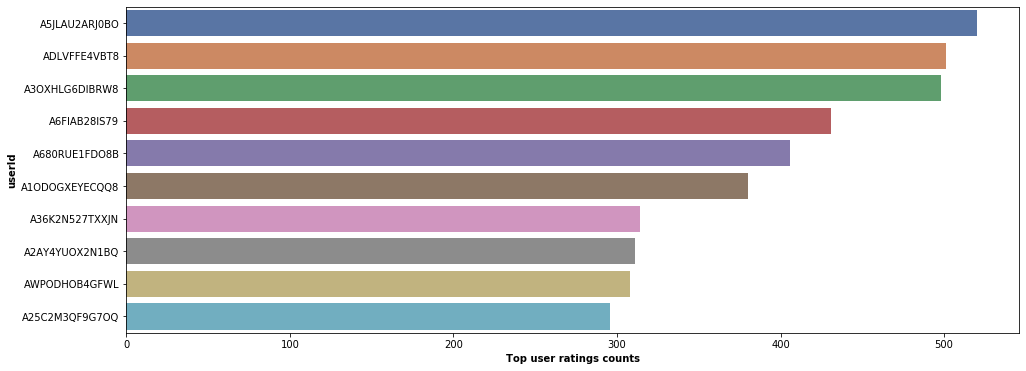

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#wavg = movies_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=amz_df1['ratings'].head(10), y=amz_df1['userId'].head(10), data=amz_df1, palette='deep')

#plt.xlim(1.0, 5.0)
#plt.title('User Counts', weight='bold')
plt.xlabel('Top user ratings counts', weight='bold')
plt.ylabel('userId', weight='bold')

plt.savefig('userratings.png')

In [21]:
amz_df1.quantile(0.5)

ratings    1.0
Name: 0.5, dtype: float64

In [22]:
amz_df1.quantile(.75)

ratings    2.0
Name: 0.75, dtype: float64

In [23]:
amz_df1.quantile(0.25)

ratings    1.0
Name: 0.25, dtype: float64

In [24]:
amz_df1.quantile(.99)

ratings    12.0
Name: 0.99, dtype: float64

###### Looking at the information above, looks like the data has a very long tail and is highly right skewed. Most of the users have ratings count of 3. The maximum # of ratings counts belong to less than 1% of the sample population.

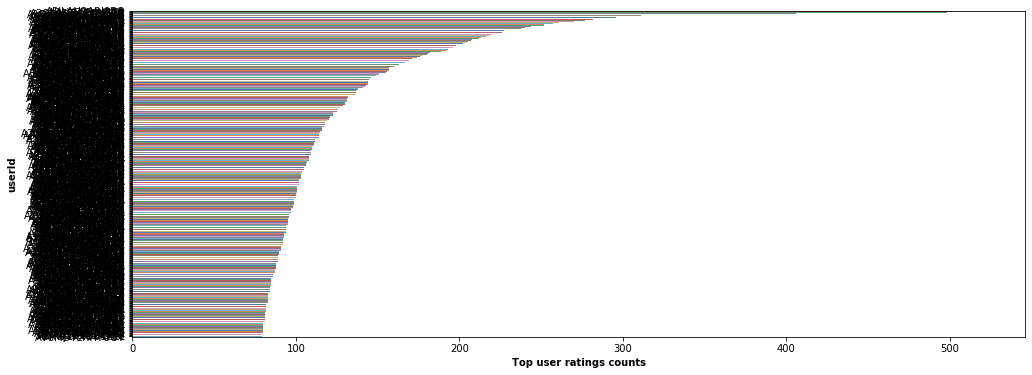

In [25]:
# Number of ratings per book
#data = amz_df.groupby(['userId']).count()[['ratings']].clip(upper=50)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=amz_df1['ratings'].head(500), y=amz_df1['userId'].head(500), data=amz_df1, palette='deep')

#plt.xlim(1.0, 5.0)
#plt.title('User Counts', weight='bold')
plt.xlabel('Top user ratings counts', weight='bold')
plt.ylabel('userId', weight='bold')

plt.savefig('userratings.png')

###### This data skew is somewhat depicted by the image above, for memory errors, the whole dataset could not be mapped.

### Grouping products by the total # of ratings recieved

In [26]:
amz_df2=amz_df.groupby(['productId']).count()[['ratings']]

In [27]:
pd.DataFrame(amz_df2)

,ratings
productId,
0132793040,1
0321732944,1
0439886341,3
0511189877,6
0528881469,27
...,...
BT008G3W52,1
BT008SXQ4C,1
BT008T2BGK,1


In [28]:
amz_df2.reset_index(inplace=True)
amz_df2=amz_df2.sort_values('ratings', ascending=False)

In [29]:
amz_df2.head(10)

,productId,ratings
308398,B0074BW614,18244
429572,B00DR0PDNE,16454
327308,B007WTAJTO,14172
102804,B0019EHU8G,12285
296625,B006GWO5WK,12226
178601,B003ELYQGG,11617
178813,B003ES5ZUU,10276
323013,B007R5YDYA,9907
289775,B00622AG6S,9823
30276,B0002L5R78,9487


In [30]:
amz_df2.tail(10)

,productId,ratings
248001,B004WL7YUC,1
248003,B004WL8K4Q,1
248004,B004WL8L6I,1
248005,B004WL8LHW,1
248009,B004WL90KY,1
248010,B004WL91KI,1
248011,B004WL9FK4,1
248015,B004WL9Q2Q,1
248016,B004WL9R8O,1
476001,BT008V9J9U,1


###### There are products that have maximum ratings of 18244 which means these are both popular as well as products that have been sold on the website for a long time now. These could also be items that one needs frequently hence the high ratings.There are ratings as low as 1, which could be of products that are either newly launched or not bought very frequently. This could be a  very expensive product and that is a  one time buy(ex: TV, SLR cameras, a/c , etc).

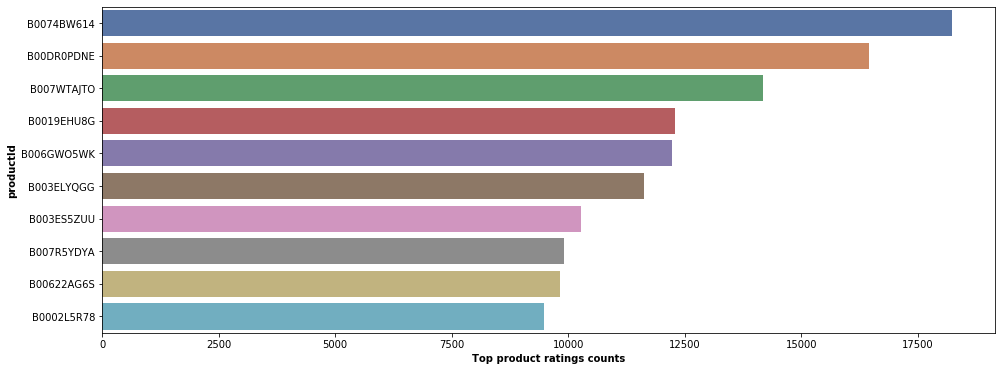

In [31]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=amz_df2['ratings'].head(10), y=amz_df2['productId'].head(10), data=amz_df2, palette='deep')

#plt.xlim(1.0, 5.0)
#plt.title('User Counts', weight='bold')
plt.xlabel('Top product ratings counts', weight='bold')
plt.ylabel('productId', weight='bold')

plt.savefig('prodratings.png')

In [32]:
amz_df2.quantile(.25)

ratings    1.0
Name: 0.25, dtype: float64

In [33]:
amz_df2.quantile(.5)

ratings    2.0
Name: 0.5, dtype: float64

In [34]:
amz_df2.quantile(0.75)

ratings    7.0
Name: 0.75, dtype: float64

In [35]:
amz_df2.quantile(0.99)

ratings    246.0
Name: 0.99, dtype: float64

###### Like user counts data, this data is also highly right skewed with most of the values as low as 7 rating to as high as 18244. The interquatile range is very huge and only 1 % of products have move than 250 ratings per product.

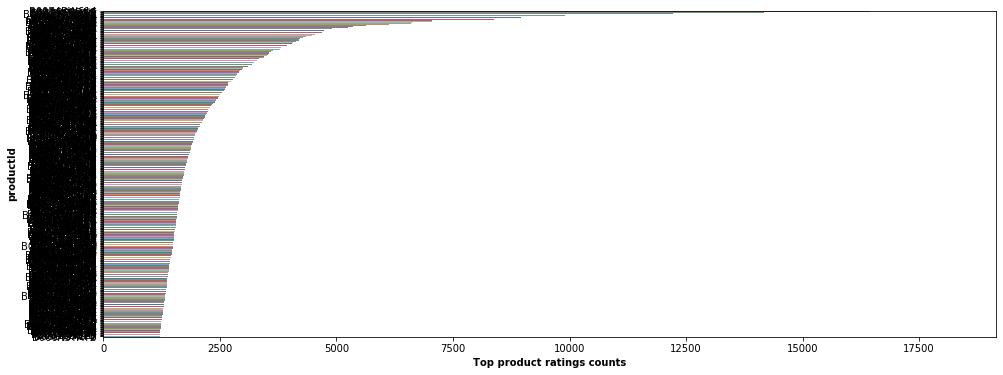

In [36]:
# Number of ratings per book
#data = amz_df.groupby(['userId']).count()[['ratings']].clip(upper=50)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=amz_df2['ratings'].head(500), y=amz_df2['productId'].head(500), data=amz_df2, palette='deep')

#plt.xlim(1.0, 5.0)
#plt.title('User Counts', weight='bold')
plt.xlabel('Top product ratings counts', weight='bold')
plt.ylabel('productId', weight='bold')

plt.savefig('userratings.png')

###### The steep skew in data can be seen with the data samples plot above for product counts.

## 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )

#### Extract productIDs that have at least 50 ratings pers userID.

In [37]:
amz_df_filter = amz_df[amz_df.groupby('userId')['ratings'].transform('count').ge(50)]

In [38]:
prod_cnt=amz_df_filter.groupby(['productId']).count()[['ratings']]

In [39]:
pd.DataFrame(prod_cnt)
prod_cnt.reset_index(inplace=True)

In [40]:

mean_cnt=amz_df_filter.groupby(['productId']).mean()[['ratings']]

In [41]:
pd.DataFrame(mean_cnt)
mean_cnt.reset_index(inplace=True)

In [42]:
prod_cnt

,productId,ratings
0,0594451647,1
1,0594481813,1
2,0970407998,2
3,0972683275,4
4,1400501466,6
...,...,...
48185,B00LED02VY,1
48186,B00LGN7Y3G,1
48187,B00LGQ6HL8,5
48188,B00LI4ZZO8,2


In [43]:
mean_cnt

,productId,ratings
0,0594451647,5.000000
1,0594481813,3.000000
2,0970407998,2.500000
3,0972683275,4.750000
4,1400501466,3.333333
...,...,...
48185,B00LED02VY,4.000000
48186,B00LGN7Y3G,5.000000
48187,B00LGQ6HL8,5.000000
48188,B00LI4ZZO8,4.500000


## Popularity Based Recommendation System

### Creating a Popularity based recommendation system using IMDB weighted average formula.

In [44]:
prod_rat_mean_cnt = pd.DataFrame(amz_df_filter.groupby('productId')['ratings'].mean())

In [45]:
prod_rat_mean_cnt['rating_counts'] = pd.DataFrame(amz_df_filter.groupby('productId')['ratings'].count())

In [46]:
prod_rat_mean_cnt['Total ratings mean']=amz_df_filter['ratings'].mean()

In [47]:
prod_rat_mean_cnt

,ratings,rating_counts,Total ratings mean
productId,,,
0594451647,5.000000,1,4.261339
0594481813,3.000000,1,4.261339
0970407998,2.500000,2,4.261339
0972683275,4.750000,4,4.261339
1400501466,3.333333,6,4.261339
...,...,...,...
B00LED02VY,4.000000,1,4.261339
B00LGN7Y3G,5.000000,1,4.261339
B00LGQ6HL8,5.000000,5,4.261339


#### Weighted popularity calculation based on IMDB weighted ratings formula

Weighted Rating (WR) =  ((v/v+m).R)+((m/v+m).C) 
where,

v is the number of votes for the movie
m is the minimum votes required to be listed in the chart
R is the average rating of the movie
C is the mean vote across the whole report


In [48]:
#C is the mean vote across the whole report
C=prod_rat_mean_cnt['Total ratings mean']

In [49]:
#V is the number of votes for each productid
V=prod_rat_mean_cnt['rating_counts']

In [50]:
#R is the mean rating for each product
R=prod_rat_mean_cnt['ratings']

In [51]:
#m is the minimum votes required to be listed in the chart;
m=prod_rat_mean_cnt['rating_counts'].quantile(0.85)

In [52]:
prod_rat_mean_cnt['weighted_average'] = ((V/(V+m)) * R) + ((m/(m+V)) * C)

In [53]:
prod_rat_mean_cnt

,ratings,rating_counts,Total ratings mean,weighted_average
productId,,,,
0594451647,5.000000,1,4.261339,4.409071
0594481813,3.000000,1,4.261339,4.009071
0970407998,2.500000,2,4.261339,3.674226
0972683275,4.750000,4,4.261339,4.505669
1400501466,3.333333,6,4.261339,3.704536
...,...,...,...,...
B00LED02VY,4.000000,1,4.261339,4.209071
B00LGN7Y3G,5.000000,1,4.261339,4.409071
B00LGQ6HL8,5.000000,5,4.261339,4.671706


In [54]:
prd_cnt_ranked = prod_rat_mean_cnt.sort_values('weighted_average', ascending=False)
#movies_ranked[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

In [55]:
prd_cnt_ranked.reset_index(inplace=True)

In [56]:
prd_cnt_ranked.head(100)

,productId,ratings,rating_counts,Total ratings mean,weighted_average
0,B0052SCU8U,4.979592,49,4.261339,4.925384
1,B000FQ2JLW,5.000000,19,4.261339,4.871537
2,B00ISFNSBW,5.000000,18,4.261339,4.865698
3,B001TH7T2U,4.925000,40,4.261339,4.864667
4,B000IJY8DS,5.000000,17,4.261339,4.859303
...,...,...,...,...,...
95,B001EAQTRI,5.000000,9,4.261339,4.772720
96,B00DKBU5W4,5.000000,9,4.261339,4.772720
97,B000BVC0WO,5.000000,9,4.261339,4.772720
98,B001MXLD4G,5.000000,9,4.261339,4.772720


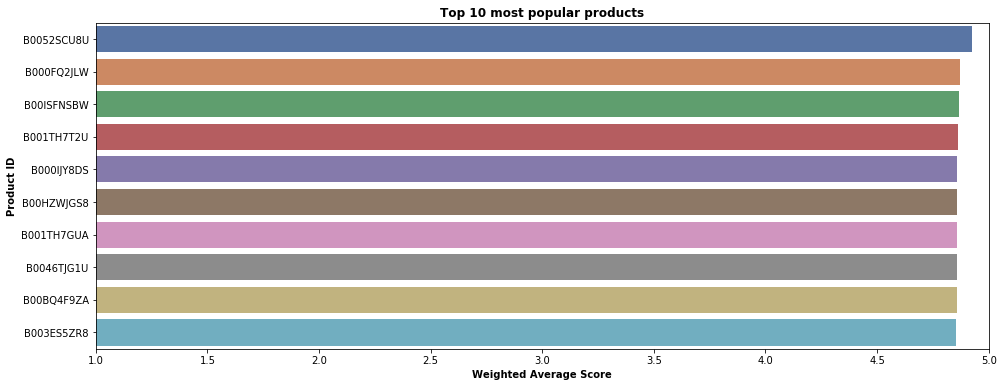

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#wavg = movies_ranked.sort_values('weighted_average', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=prd_cnt_ranked['weighted_average'].head(10), y=prd_cnt_ranked['productId'].head(10), data=prd_cnt_ranked, palette='deep')

plt.xlim(1.0,5.0)
plt.title('Top 10 most popular products', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Product ID', weight='bold')

plt.savefig('Popular_Products.png')

### The most popular top 10 items have been shown above that can be recommended to users who are new users to accelerate sales.

## Collaborative Filtering Recommedation Systems

In [58]:
Count=amz_df.groupby('userId')['ratings'].count()

In [59]:
Count.max()

520

In [60]:
Count.median()

1.0

In [61]:
Count.quantile(0.99)

12.0

Since, this dataset has a very long tail when it comes to the # of users ratings count , we will filter our records, where user ratings counts are minimum of 150 ratings per user per product ID inorder to avoid running into “memory error” and to filter out rarely rated products and rarely rating users.

In [62]:
user_user = amz_df[amz_df.groupby('userId')['ratings'].transform('count').ge(150)]

In [63]:
user_user.shape

(21960, 3)

In [64]:
user_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21960 entries, 178 to 7824444
Data columns (total 3 columns):
userId       21960 non-null object
productId    21960 non-null object
ratings      21960 non-null float64
dtypes: float64(1), object(2)
memory usage: 686.2+ KB


In [65]:
user_user.reset_index(inplace = True, drop = True) 

In [66]:
user_user

,userId,productId,ratings
0,A17HMM1M7T9PJ1,0970407998,4.0
1,A3TAS1AG6FMBQW,0972683275,5.0
2,A5JLAU2ARJ0BO,1400532655,1.0
3,A3PD8JD9L4WEII,1400699169,5.0
4,A1ZU55TM45Y2R8,8862936826,2.0
...,...,...,...
21955,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
21956,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
21957,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
21958,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [67]:
user_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21960 entries, 0 to 21959
Data columns (total 3 columns):
userId       21960 non-null object
productId    21960 non-null object
ratings      21960 non-null float64
dtypes: float64(1), object(2)
memory usage: 514.8+ KB


In [68]:
user_user.head(100)

,userId,productId,ratings
0,A17HMM1M7T9PJ1,0970407998,4.0
1,A3TAS1AG6FMBQW,0972683275,5.0
2,A5JLAU2ARJ0BO,1400532655,1.0
3,A3PD8JD9L4WEII,1400699169,5.0
4,A1ZU55TM45Y2R8,8862936826,2.0
...,...,...,...
95,A231WM2Z2JL0U3,B00002SWHH,3.0
96,A3OXHLG6DIBRW8,B00003006E,5.0
97,A23GFTVIETX7DS,B00003006E,5.0
98,A36K2N527TXXJN,B00003006E,5.0


In [69]:
# unique users and items within data
n_users = user_user['userId'].unique().shape[0]
n_items = user_user['productId'].unique().shape[0]
print('Total # of users:',n_users)
print('Total # of products:',n_items)

Total # of users: 99
Total # of products: 13451


In [70]:
from surprise import SVD, Reader, Dataset
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

### Reading input data into Surprise for KNNWithMeans and SVD algorithm for collaborative filtering.

In [71]:
reader = Reader(rating_scale=(1, 5))
ratings = user_user
data = Dataset.load_from_df(ratings[['userId', 'productId', 'ratings']], reader)

## 4. Split the data randomly into train and test dataset. 

In [72]:
trainset, testset = train_test_split(data, test_size=.30,random_state=42)

## 5. Build Collaborative Filtering model.

### User-User Collaborative Filtering

### Using KNN

In [73]:
from surprise import KNNWithMeans

###### KNNWithMeans using Cosine Similarity for user based filtering

In [74]:
# fit KNNWithMeans on Trainset
algo = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': True},random_state=42)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [75]:
# Make predictions on Testset
test_pred = algo.test(testset)

In [76]:
test_pred

[Prediction(uid='A3FEGTOLCWXSV4', iid='B004HVW0ZQ', r_ui=4.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B00622AG6S', r_ui=5.0, est=4.935203959982159, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B003VAGXWK', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B00AA5LPT0', r_ui=5.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B00FDLGMJE', r_ui=5.0, est=4.833328979131781, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B005Z5HT2M', r_ui=2.0, est=4.313817330210773, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000JJSQ8U', r_ui=4.0, est=4.355096277374939, d

In [77]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 0.9910


0.9909806784740315

## 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

###### Evaluate the alogorithm using Cross-Validate with 5 K-folds and Optimization Metric as  RMSE, MAE and Multithreading with 5 Threads

In [78]:
from surprise.model_selection import cross_validate

In [79]:
knnmeans_cv = cross_validate(KNNWithMeans(k=10,sim_options={'name': 'cosine', 'user_based': True}), data, cv=5, n_jobs=5, verbose=False)

In [80]:
knnmeans_cv

{'test_rmse': array([0.98078385, 0.98592981, 0.97547793, 0.99849362, 0.9923449 ]),
 'test_mae': array([0.71578009, 0.71351087, 0.71512094, 0.72904069, 0.72749714]),
 'fit_time': (0.029020309448242188,
  0.03001713752746582,
  0.029011011123657227,
  0.025017738342285156,
  0.0250091552734375),
 'test_time': (0.11707639694213867,
  0.11607909202575684,
  0.12808609008789062,
  0.10306668281555176,
  0.09306192398071289)}

In [81]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

KNN Means 	 0.9866 	 0.7202


### Using SVD

In [82]:
algo = SVD(random_state=42)
algo.fit(trainset)

In [83]:
test_pred_SVD = algo.test(testset)

In [84]:
test_pred_SVD

[Prediction(uid='A3FEGTOLCWXSV4', iid='B004HVW0ZQ', r_ui=4.0, est=4.008909311001089, details={'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B00622AG6S', r_ui=5.0, est=4.757822967113908, details={'was_impossible': False}),
 Prediction(uid='A11I1I9QLMAM1A', iid='B003VAGXWK', r_ui=5.0, est=4.4603248792902574, details={'was_impossible': False}),
 Prediction(uid='A1EXGL6L0QQ0M5', iid='B00AA5LPT0', r_ui=5.0, est=4.340000346941311, details={'was_impossible': False}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B00FDLGMJE', r_ui=5.0, est=4.654743297600934, details={'was_impossible': False}),
 Prediction(uid='A6VXZ1EEPRTLV', iid='B005Z5HT2M', r_ui=2.0, est=4.063308464847138, details={'was_impossible': False}),
 Prediction(uid='AGVWTYW0ULXHT', iid='B000JJSQ8U', r_ui=4.0, est=4.108285585783704, details={'was_impossible': False}),
 Prediction(uid='A5JLAU2ARJ0BO', iid='B00006LFI5', r_ui=5.0, est=3.8706018413380803, details={'was_impossible': False}),
 Prediction(uid='A3T7V207KRDE2O',

In [85]:
# get RMSE
print("User-based Model : Test Set")
accuracy.rmse(test_pred_SVD, verbose=True)

User-based Model : Test Set
RMSE: 0.9176


0.9176045149727444

###### Evaluate the alogorithm using Cross-Validate with 5 K-folds and Optimization Metric as  RMSE, MAE and Multithreading with 5 Threads

In [86]:
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)

In [87]:
svd_cv

{'test_rmse': array([0.92181286, 0.90689548, 0.92001649, 0.90686086, 0.90688473]),
 'test_mae': array([0.68497868, 0.68062283, 0.68773738, 0.68124488, 0.68190134]),
 'fit_time': (3.6764543056488037,
  3.7414934635162354,
  3.8885931968688965,
  3.4583091735839844,
  2.8989386558532715),
 'test_time': (0.11007332801818848,
  0.10707306861877441,
  0.10807228088378906,
  0.06704521179199219,
  0.06004023551940918)}

In [88]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('SVD CV', '\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

SVD CV 	 0.9125 	 0.6833


### Comparing SVD and KNNWithMeans

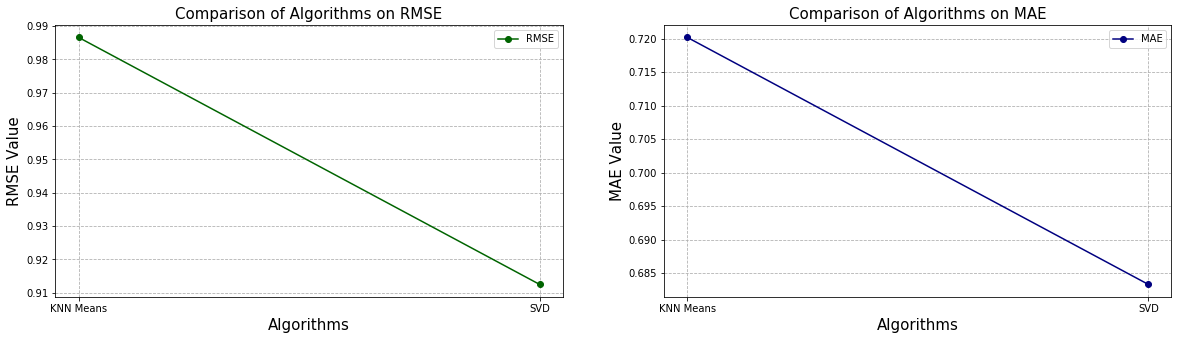

In [89]:
x_algo = ['KNN Means', 'SVD']
all_algos_cv = [knnmeans_cv, svd_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

##### Clearly SVD is a winner in reducing RMSE and MAE.

### Best and worst recommendations for SVD predictions

In [90]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(test_pred_SVD, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [91]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

##### Top 5 Best recommedations that have least errors

In [92]:
best_predictions.head(5)

,uid,iid,rui,est,details,Iu,Ui,err
770,A2NYK9KWFMJV4Y,B00L2442H0,5.0,5.0,{'was_impossible': False},177,6,0.0
3685,A2NOW4U7W3F7RI,B00HHRP11C,5.0,5.0,{'was_impossible': False},187,5,0.0
3025,ABDR6IJ93HFIO,B00FUV7OP8,5.0,5.0,{'was_impossible': False},143,4,0.0
197,A2NOW4U7W3F7RI,B00212NO6W,5.0,5.0,{'was_impossible': False},187,3,0.0
2628,A1CMD08Z49PGKQ,B003XIJ3MW,5.0,5.0,{'was_impossible': False},151,5,0.0


In [93]:
worst_predictions.head(5)

,uid,iid,rui,est,details,Iu,Ui,err
6523,A1X1CEGHTHMBL1,B0030FMTKQ,1.0,4.590283,{'was_impossible': False},136,0,3.590283
3224,A3OA4DV4L81N1D,B001RIMZUW,1.0,4.593962,{'was_impossible': False},167,0,3.593962
6583,A3OA4DV4L81N1D,B004EC1YY6,1.0,4.593962,{'was_impossible': False},167,0,3.593962
4767,A2B7BUH8834Y6M,B001G5ZTLS,1.0,4.622891,{'was_impossible': False},129,1,3.622891
1196,A2NOW4U7W3F7RI,B0007SM8OQ,1.0,4.653122,{'was_impossible': False},187,1,3.653122


## 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [94]:
from collections import defaultdict

In [95]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [97]:
top_user_recom=get_top_n(test_pred_SVD, n=5)

In [99]:
top_recom_users=pd.DataFrame.from_dict(top_user_recom)

#### Top K 5 user recommendations

In [154]:
top_recom_users.T

,0,1,2,3,4
A3FEGTOLCWXSV4,"(B003ZSHNGS, 4.379387531934434)","(B0043CVH2Q, 4.270461127716426)","(B0041L3JS4, 4.207863505201539)","(B009O7XGCY, 4.205389820531723)","(B0029EB3OC, 4.181715701862038)"
A1X1CEGHTHMBL1,"(B001S4OTS6, 5)","(B006FLENJC, 4.968947076899896)","(B009UNZ5WQ, 4.916068554835384)","(B00AYQ433U, 4.876842668257118)","(B00081A2KY, 4.839244773904216)"
A11I1I9QLMAM1A,"(B002SH43MO, 4.7733060301326535)","(B007WTAJTO, 4.713208909632629)","(B00DQKQ7U8, 4.627890025115116)","(B00G6SNT9O, 4.622208379897195)","(B008ABOJKS, 4.61944545367557)"
A1EXGL6L0QQ0M5,"(B0034CL2ZI, 4.774404534435863)","(B002HWRJBM, 4.656622671482179)","(B008OIYDM6, 4.632641527987802)","(B00CB2F65O, 4.608742234230663)","(B003Z4G3I6, 4.5322890995641965)"
A25C2M3QF9G7OQ,"(B000JMJWV2, 4.9546761230548375)","(B001AYW91I, 4.951758055789585)","(B004CLYEDC, 4.91615901198794)","(B00E3FHXYO, 4.913837958279378)","(B00HG1L334, 4.868835206628592)"
...,...,...,...,...,...
AEJAGHLC675A7,"(B00829THK0, 5)","(B00077AA5Q, 5)","(B0079UAT0A, 5)","(B001TH7GUU, 5)","(B002SZEOLG, 4.952320963172915)"
A17HMM1M7T9PJ1,"(B00G4UQ6U8, 4.7195854604448515)","(B000058BCQ, 4.462732514949176)","(B002ZIMEMW, 4.353973878291995)","(B002XITTS6, 4.301451860357522)","(B000MEC8EU, 4.271845051766256)"
A11KZ906QD08C5,"(B002WE6D44, 4.746412510389093)","(B00B588HY2, 4.631043989319258)","(B00ICZL3KG, 4.5525041730361355)","(B000BI2180, 4.536615032134235)","(B0012YA4YK, 4.529430492988559)"
A3TAS1AG6FMBQW,"(B001F51G16, 5)","(B004CLYEFK, 5)","(B003ELYQGG, 5)","(B00CROC9JC, 4.964069442669451)","(B00D4MFPLA, 4.92005261552741)"


### Item-Item Collaborative Filtering

In [103]:
Count_prd=amz_df.groupby('productId')['ratings'].count()

In [104]:
Count_prd.max()

18244

In [105]:
Count_prd.min()

1

In [106]:
Count_prd.quantile(.995)

421.0

##### Since, this dataset has a very long tail when it comes to the # of users ratings count , we will filter our records, product IDs have minimum of 100 ratings and each user has atleast rated 50 times.

In [107]:
prod_df = amz_df[amz_df.groupby(['productId'])['ratings'].transform('count').ge(100)]

In [108]:
prod_df.shape

(4471779, 3)

In [109]:
pd.DataFrame(prod_df)
prod_df.reset_index(inplace=True)

In [110]:
item_item=prod_df[prod_df.groupby(['userId'])['ratings'].transform('count').ge(50)]

In [111]:
item_item

,index,userId,productId,ratings
448,631,A3TAS1AG6FMBQW,0972683275,5.0
1385,1777,A18S2VGUH9SCV5,1400501776,4.0
1766,2162,A5JLAU2ARJ0BO,1400532655,1.0
3483,6208,A1VHCO8RQFIGQJ,9983891212,4.0
3528,6253,A1OGCPMSIVK7G4,9983891212,5.0
...,...,...,...,...
4471595,7820340,AIJQU979J6UFY,B00K91DB7Y,4.0
4471601,7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0
4471611,7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0
4471677,7821471,A4WEZJOIZIV4U,B00KFAGCUM,5.0


In [112]:
item_item.reset_index(inplace = True, drop = True) 
item_item.drop('index',inplace=True,axis=1)

In [113]:
item_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 3 columns):
userId       21352 non-null object
productId    21352 non-null object
ratings      21352 non-null float64
dtypes: float64(1), object(2)
memory usage: 500.6+ KB


In [114]:
item_item.head(10)

,userId,productId,ratings
0,A3TAS1AG6FMBQW,0972683275,5.0
1,A18S2VGUH9SCV5,1400501776,4.0
2,A5JLAU2ARJ0BO,1400532655,1.0
3,A1VHCO8RQFIGQJ,9983891212,4.0
4,A1OGCPMSIVK7G4,9983891212,5.0
5,A18HE80910BTZI,9983891212,5.0
6,ADOR3TR7GDF68,B000001OM5,1.0
7,A2ZY49IDE6TY5I,B000001ON6,4.0
8,A1T1YSCDW0PD25,B00000DM9W,5.0
9,ABVYGB2TKBO8F,B00000DM9W,5.0


In [115]:
#unique users and products
n_users = item_item['userId'].unique().shape[0]
n_items = item_item['productId'].unique().shape[0]
print('Total # of users:',n_users)
print('Total # of products:',n_items)

Total # of users: 283
Total # of products: 6908


### Reading input data into Surprise for KNNWithMeans and SVD algorithm for collaborative filtering.

In [116]:
reader = Reader(rating_scale=(1, 5))
ratings = item_item
data = Dataset.load_from_df(ratings[['userId', 'productId', 'ratings']], reader)

### 4. Split the data randomly into train and test dataset.

In [117]:
trainset, testset = train_test_split(data, test_size=.30,random_state=42)

### Item-Item Collaborative Filtering

### With KNNWithMeans

In [118]:
algo = KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': False},random_state=42)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [119]:
test_pred_item = algo.test(testset)
test_pred_item

[Prediction(uid='A3J8A5L5AF5TX9', iid='B001C271MA', r_ui=5.0, est=4.802564102564102, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A17BUUBOU0598B', iid='B004CLYEDC', r_ui=4.0, est=4.108921356421356, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A1OGCPMSIVK7G4', iid='9983891212', r_ui=5.0, est=4.520833333333333, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A2KYRPDKVBI2R4', iid='B005N4QHEG', r_ui=5.0, est=4.337280877826843, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A35HUT8MQMT21L', iid='B000VX6XL6', r_ui=5.0, est=4.279607115514033, details={'actual_k': 5, 'was_impossible': False}),
 Prediction(uid='AVPNQUVZWMDSX', iid='B005EOWBKE', r_ui=5.0, est=5, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A3J8A5L5AF5TX9', iid='B0009Y7APU', r_ui=5.0, est=4.081887556887557, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid=

In [120]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_item, verbose=True)

Item-based Model : Test Set
RMSE: 1.0559


1.0558510343265255

## 6. Evaluate the above model. ( Once the model is trained on the training data, it can beused to compute the error (like RMSE) on predictions made on the test data.) You canalso use a different method to evaluate the models

In [121]:
knnmeans_cv_item = cross_validate(KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': False}), data, cv=5, n_jobs=5, verbose=False)

In [122]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

KNN Means 	 0.9866 	 0.7202


### SVD

In [123]:
algo = SVD(random_state=42)
algo.fit(trainset)

In [124]:
test_pred_SVD_item = algo.test(testset)
test_pred_SVD_item

[Prediction(uid='A3J8A5L5AF5TX9', iid='B001C271MA', r_ui=5.0, est=4.019377845527666, details={'was_impossible': False}),
 Prediction(uid='A17BUUBOU0598B', iid='B004CLYEDC', r_ui=4.0, est=3.8912878784185656, details={'was_impossible': False}),
 Prediction(uid='A1OGCPMSIVK7G4', iid='9983891212', r_ui=5.0, est=4.2467314945534325, details={'was_impossible': False}),
 Prediction(uid='A2KYRPDKVBI2R4', iid='B005N4QHEG', r_ui=5.0, est=4.711075293376509, details={'was_impossible': False}),
 Prediction(uid='A35HUT8MQMT21L', iid='B000VX6XL6', r_ui=5.0, est=4.459378518797458, details={'was_impossible': False}),
 Prediction(uid='AVPNQUVZWMDSX', iid='B005EOWBKE', r_ui=5.0, est=4.517442465394574, details={'was_impossible': False}),
 Prediction(uid='A3J8A5L5AF5TX9', iid='B0009Y7APU', r_ui=5.0, est=3.8665557779175734, details={'was_impossible': False}),
 Prediction(uid='A1X1CEGHTHMBL1', iid='B008DJAYJM', r_ui=5.0, est=4.636457718418302, details={'was_impossible': False}),
 Prediction(uid='A1ZU55TM45Y2R

In [125]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9910


0.9909806784740315

In [126]:
svd_cv_item = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)

In [127]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('SVD CV', '\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

SVD CV 	 0.9125 	 0.6833


## Comparing SVD and KNNWithMeans

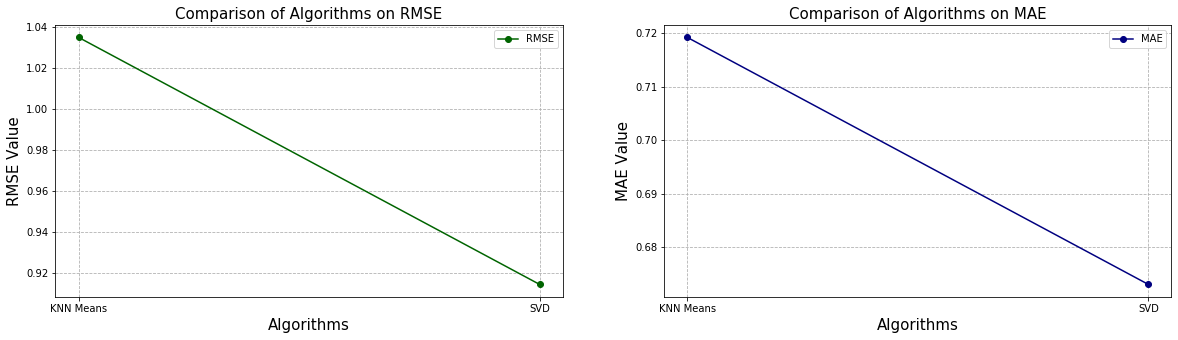

In [128]:
x_algo = ['KNN Means', 'SVD']
all_algos_cv = [knnmeans_cv_item, svd_cv_item]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

#### Clearly SVD is a winner in reducing RMSE and MAE

### Get top - K ( K = 5) recommendations for SVD predictions

In [129]:
# Let's build a pandas dataframe with all the predictions

def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

df = pd.DataFrame(test_pred_SVD_item, columns=['uid', 'iid', 'rui', 'est', 'details'])    
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [130]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

#### Top 5 best item recommendations with least errors

In [133]:
best_predictions.head(5)

,uid,iid,rui,est,details,Iu,Ui,err
1908,A1Z16630QMH8Q6,B0034CL2ZI,5.0,5.0,{'was_impossible': False},34,21,0.0
5252,ABDR6IJ93HFIO,B006W8U2MU,5.0,5.0,{'was_impossible': False},60,12,0.0
493,A1E1LEVQ9VQNK,B000KO0GY6,5.0,5.0,{'was_impossible': False},62,10,0.0
2328,A23ZXHFLC6TBLD,B000HPV3RW,5.0,5.0,{'was_impossible': False},33,21,0.0
978,A1Z16630QMH8Q6,B001E1Y5O6,5.0,5.0,{'was_impossible': False},34,16,0.0


In [134]:
worst_predictions.head(5)

,uid,iid,rui,est,details,Iu,Ui,err
3918,A1CMD08Z49PGKQ,B004SD22PQ,1.0,4.656709,{'was_impossible': False},93,0,3.656709
4590,A3077MQTAKOVFZ,B008D1JRIO,1.0,4.675180,{'was_impossible': False},32,3,3.675180
5638,A3AYSYSLHU26U9,B0018LO1R8,1.0,4.675962,{'was_impossible': False},85,1,3.675962
5352,A19UTUEBWKIZFT,B002LARRDK,1.0,4.702481,{'was_impossible': False},47,6,3.702481
2459,A1PV5T5S4D5NPI,B001DQT40M,1.0,4.789877,{'was_impossible': False},40,0,3.789877


## 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

In [135]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [136]:
get_top_n(test_pred_SVD_item, n=5)

defaultdict(list,
            {'A3J8A5L5AF5TX9': [('B001TH7GSW', 4.27241374903269),
              ('B00104XCVO', 4.164350379657621),
              ('B004OF9XGO', 4.15032075016307),
              ('B0002MQGOA', 4.062909613405416),
              ('B001C271MA', 4.019377845527666)],
             'A17BUUBOU0598B': [('B000EPJL1A', 3.9719080523559103),
              ('B004CLYEFK', 3.968812941008288),
              ('B001DJ64D4', 3.905123423227677),
              ('B004CLYEDC', 3.8912878784185656),
              ('B0039BPG1K', 3.871227232113402)],
             'A1OGCPMSIVK7G4': [('B004GUS4WG', 4.603010678201938),
              ('B007WTAJTO', 4.359683158733917),
              ('B0010SIAV2', 4.335109494664292),
              ('B002MCZJ78', 4.313879605878601),
              ('9983891212', 4.2467314945534325)],
             'A2KYRPDKVBI2R4': [('B000N99BBC', 5),
              ('B00A35WYBA', 4.912574102353497),
              ('B003Z4G3I6', 4.873766214069238),
              ('B00AO1XFM0', 4.858320822

In [144]:
Top_item_recomm=pd.DataFrame(get_top_n(test_pred_SVD_item, n=5))

In [152]:
Top_item_recomm=Top_item_recomm.T

### Top 5 item recommendations for eachc user

In [153]:
Top_item_recomm

,0,1,2,3,4
A3J8A5L5AF5TX9,"(B001TH7GSW, 4.27241374903269)","(B00104XCVO, 4.164350379657621)","(B004OF9XGO, 4.15032075016307)","(B0002MQGOA, 4.062909613405416)","(B001C271MA, 4.019377845527666)"
A17BUUBOU0598B,"(B000EPJL1A, 3.9719080523559103)","(B004CLYEFK, 3.968812941008288)","(B001DJ64D4, 3.905123423227677)","(B004CLYEDC, 3.8912878784185656)","(B0039BPG1K, 3.871227232113402)"
A1OGCPMSIVK7G4,"(B004GUS4WG, 4.603010678201938)","(B007WTAJTO, 4.359683158733917)","(B0010SIAV2, 4.335109494664292)","(B002MCZJ78, 4.313879605878601)","(9983891212, 4.2467314945534325)"
A2KYRPDKVBI2R4,"(B000N99BBC, 5)","(B00A35WYBA, 4.912574102353497)","(B003Z4G3I6, 4.873766214069238)","(B00AO1XFM0, 4.858320822382374)","(B002PAX9QU, 4.8551626972295665)"
A35HUT8MQMT21L,"(B002WE6D44, 4.937274130328456)","(B000VX6XL6, 4.459378518797458)","(B004XC6GJ0, 4.451199736882483)","(B004GF8TIK, 4.373351993254268)","(B003DZ14EU, 4.355644427353512)"
...,...,...,...,...,...
A27M75LRSJ788H,"(B006GWO5WK, 5)","(B007WTAJTO, 5)","(B000JMJWV2, 5)","(B005FYNSPK, 4.952245645471406)","(B008PWUO4W, 4.90481989486967)"
A19UTUEBWKIZFT,"(B004CLYEH8, 5)","(B00G4UQ6U8, 4.958721855866808)","(B004XC6GJ0, 4.895052242667531)","(B004CLYEDC, 4.75457401132363)","(B002LARRDK, 4.702480540877525)"
A3IY316DRNF5F2,"(B006W8U2MU, 4.538273490562917)","(B007I5JT4S, 4.461265361193704)","(B004VM0SE6, 4.253882393605831)","(B005J7YA3W, 4.211830257677658)","(B000EWHH7I, 4.203541594018721)"
A197T2N6RU7K56,"(B001AW8W7A, 4.859856338701213)","(B005K7192G, 4.841108271242547)","(B004U78J1G, 4.742731421155039)","(B004EBZZX8, 4.677136736217118)","(B000PH1DL8, 4.666949232590547)"


## 8. Summarise your insights.

The popularity bases items are soley based on the ratings count or frequency of a product(with or without weighted ratings). There is no way to know the user habits.Also, the products with very few ratings will never make this list until a hybrid recommendation system is used such as popularity with random. This approach can be weighted to make sure, random recommedations are for those products which have very low ratings count but high rating values. 

There are limitations with collaborative filtering with a straightforward implementation, it is obeserved that the recommendations tend to be already popular, and the items from the long tail section might get ignored.
User user-Scalability is an issue as KNN needs to compute nearest neighbors for both items and users.So, large data are slow down KNN by a great extent.

Hybrid recommedation system with Collaborative and content-based filtering might help get over the classic problems of collaborative filtering such as cold start ,etc.

For Collaborative filtering, SVD outperforms KNNWithMeans with better RMSE and MAE.